### Missing Value imputation

Dataset might contain missing values. In datasets, missing values could be represented as '?', 'nan', 'N/A', blank cell, or sometimes '-999', 'inf', '-inf'.

There are various ways that we can handle missing values. These are:

1. Drop the column altogether when there is very high number of elements are missing (Ex: 70%)
2. Drop the row if most of the entries are missing. However this can be done for a big data set. Also if such rows exists very less (Ex: <5%)
3. Replace missing value with 0 or any constant value. However, this is very case specific and has to present in a relatively small size
3. Missing value imputation with mean, median (With numerical variable) and mode (with categorical variable). However, This technique can be implemented when the amount of missing value is roughly between 10% - 20% max. This technique does not consider correlations between features.Hence, if the number of missing value in the column is high and we use this technique, we actually implement biasness in the data. Basically if we can consider that the missingness of the data is random then it is good to impute with this method. However, it is good to impute with median rather than mean to avoid the effect of outliers in the data if present
4. Missing Value Imputation with `Random Sample Imputation`
5. Missing Value Imputation with creating a new column in the dataset
6. Missing Value Imputation with the help of `Arbitrary Value Imputation` or impute with some other value which cannot be present in the dataset (Ex: 999999)
7. Missing value imputation using `SimpleImputer` from sklearn
4. Regression imputation - Mean,Median and Mode does not consider other columns. Hence, if we know that features are dependant and there is a correlation between the missing value and other variables, we can often get better guesses by a linear regression
5. K-nearest neighbour or KNN imputation
6. Imputation Using Multivariate Imputation by Chained Equation (MICE)

#### Mean/Median/Mode Imputation

In [178]:
import numpy as np
import pandas as pd

In [179]:
# Median Imputation
df = pd.read_csv(r'\Bigmart Sales\Train.csv')

In [180]:
#check for missing values (%)
round(df.isnull().sum()*100/df.shape[0],0)

Item_Identifier               0.0
Item_Weight                  17.0
Item_Fat_Content              0.0
Item_Visibility               0.0
Item_Type                     0.0
Item_MRP                      0.0
Outlet_Identifier             0.0
Outlet_Establishment_Year     0.0
Outlet_Size                  28.0
Outlet_Location_Type          0.0
Outlet_Type                   0.0
Item_Outlet_Sales             0.0
dtype: float64

In [181]:
# Let us consider Item_Weight
df['Item_Weight_1'] = df['Item_Weight'].fillna(df.Item_Weight.median())
df.Item_Weight.median()

12.6

In [182]:
# Let us check the standard daviation
print(df['Item_Weight'].std())
print(df['Item_Weight_1'].std())


4.643456499186395
4.227240406467719


There is very negligible difference. Let us look into this visually

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\91973\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\91973\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Probability Density')

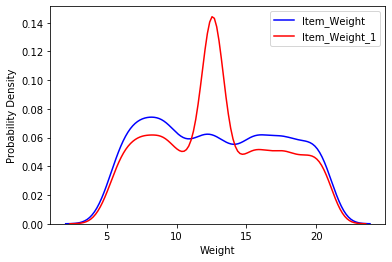

In [184]:
# Plotting the KDE Plot 
sns.kdeplot(df['Item_Weight'], color='b', shade=False, Label='Item_Weight') 
sns.kdeplot(df['Item_Weight_1'], color='r', shade=False, Label='Item_Weight_1') 
# Setting the X and Y Label 
plt.xlabel('Weight') 
plt.ylabel('Probability Density') 

In this case, we can see that once we impute with median most of the numbers belongs to that which making the graph spiked at median value

#### Random Sample Imputation

Random Sample Imputation generally pickup data randomly from the same column and then replace it. Generally the principle here also is same as mean/median/mode imputation where we consider that the nature of missing value is random

In [185]:
# Let us look at our dataset again
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


We have a new column called Item_Weight_1 which is median imputation. Now let us have one more column with Random Sample
imputation and compare

First let us get get the set of data from Item_Weight column where we do not have any null. Since this set of data is randomly
taken,every time we run it, it be will getting changed. Hence,random_state=0 will ensure that once we pick the set it get fixed and
do not change along with repeat iteration.Here note that we will be getting a list of value only for same number of rows where
we have null. dropna() function will ensure this.  


In [186]:
random_sample = df['Item_Weight'].dropna().sample(df['Item_Weight'].isnull().sum(),random_state=0)

In [187]:
#now we need to assign the index number of null rows to this set of data
random_sample.index = df[df['Item_Weight'].isnull()].index

In [188]:
df['Item_Weight_2'] = df.Item_Weight.replace(np.NaN, random_sample)

Text(0, 0.5, 'Probability Density')

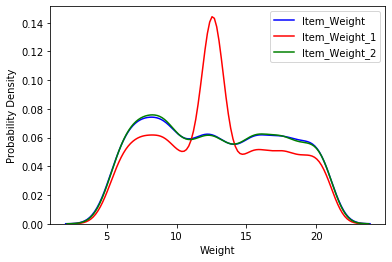

In [189]:
# Plotting the KDE Plot again
sns.kdeplot(df['Item_Weight'], color='b', shade=False, Label='Item_Weight') 
sns.kdeplot(df['Item_Weight_1'], color='r', shade=False, Label='Item_Weight_1') 
sns.kdeplot(df['Item_Weight_2'], color='g', shade=False, Label='Item_Weight_2') 
# Setting the X and Y Label 
plt.xlabel('Weight') 
plt.ylabel('Probability Density') 

Now, we can see that the random sample imputation has done the imputation without very less change in the column

#### Create a new column For missing value
 create a new column with 0 & 1 where 0 is when the target column value is present and 1 it is not present. The, replacce the main column missing value with median/mean. Hence, we are creating a new column with importance of missing value and this will
impact the modelling technique. However one major disadvantage of this technique is, it will create new columns which is a problem for bigger dataset with so many columns having missing value

#### End of Tail Method

It is a specific technique when we know that missing data is not random

In [190]:
# Let us consider Titanic data for example
df_titanic = pd.read_csv(r"train.csv")

In [191]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

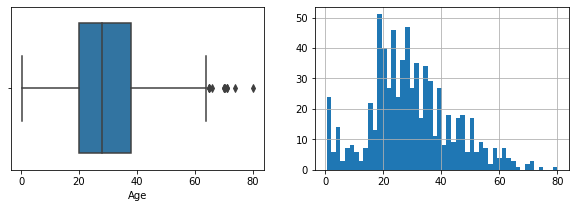

In [192]:
# Let us consider Age column here
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot('Age',data = df_titanic)
plt.subplot(1,2,2)
df_titanic.Age.hist(bins=50)

In [193]:
# NOw we can capture the right extreme value or values after 3rd normal distribution
beyond=df_titanic.Age.mean()+3*df_titanic.Age.std()

In [194]:
df_titanic['Age_Beyond'] = df_titanic['Age'].fillna(beyond)

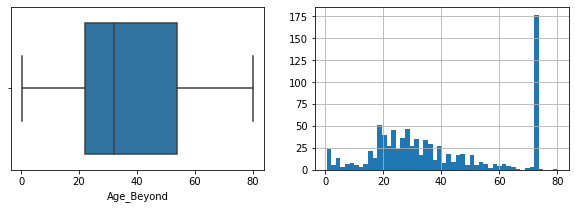

In [195]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot('Age_Beyond',data = df_titanic)
plt.subplot(1,2,2)
df_titanic.Age_Beyond.hist(bins=50)

#### Arbittrary value imputation

It is not much used in modelling technique. But depend on scenario it might require.

#### Use of SimpleImputer from sklearn

In [196]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1,Item_Weight_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [197]:
# First Let us check the mean value of the column as we are going to impute by mean
df.Item_Weight.mean()

12.857645184136183

In [198]:
from sklearn.impute import SimpleImputer 

In [199]:
df_titanic = df_titanic[['PassengerId','Age']]
#First let us keep a copy of the dataset for further comparision
df_titanic_1 = df_titanic.copy()
df_titanic.rename(columns = {'Age':'Age_new'},inplace = True)

In [200]:
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(df_titanic)
df_titanic = imputer.transform(df_titanic)

In [201]:
df_titanic = pd.DataFrame(df_titanic) # convert back to a dataframe

In [202]:
df_titanic.columns = ['PassengerId','Age_new']

C:\Users\91973\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\91973\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Probability Density')

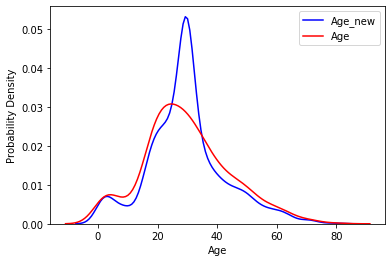

In [204]:
# Let us compare the age column now:
# Plotting the KDE Plot again
sns.kdeplot(df_titanic['Age_new'], color='b', shade=False, Label='Age_new') 
sns.kdeplot(df_titanic_1['Age'], color='r', shade=False, Label='Age') 
# Setting the X and Y Label 
plt.xlabel('Age') 
plt.ylabel('Probability Density') 

Again we can see that due mean imputation, most of the data of this column falls near the mean resulting the pick of the graph

### KNN imputation

KNN is a good technique for missing value imputation for Categorical Data

In [54]:
import numpy as np
import pandas as pd

In [55]:
from sklearn.impute import KNNImputer

In [56]:
#create dataset
a = {'First':[100,90,np.nan,95],
    'Second':[30,45,41,np.nan],
    'Third': [np.nan,40,80,99]}

In [57]:
# create dataframe
df = pd.DataFrame(a)

In [58]:
df.head()

,First,Second,Third
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,41.0,80.0
3,95.0,NaN,99.0


In [59]:
imputer = KNNImputer(n_neighbors=2)

In [60]:
df1 = imputer.fit_transform(df)

In [61]:
df1

array([[100. ,  30. ,  89.5],
       [ 90. ,  45. ,  40. ],
       [ 97.5,  41. ,  80. ],
       [ 95. ,  35.5,  99. ]])

In [62]:
df1 = pd.DataFrame(df1,columns=['First','Second','Third'])

In [63]:
df1.head()

,First,Second,Third
0,100.0,30.0,89.5
1,90.0,45.0,40.0
2,97.5,41.0,80.0
3,95.0,35.5,99.0


### Categorical Features Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'\Taitanic\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
100*df.isnull().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Mode Imputation

In [16]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since Embarked has only 0.22 % of missing value, we can go ahead and impute with mode

In [19]:
df['Embarked'] = df.Embarked.fillna('S')